In [438]:
import pandas as pd
print(pd.__version__)
print(pd.__name__)

import numpy as np #импорт библиотеки для мат. вычислений

import matplotlib.pyplot as plt
import seaborn as sns


1.4.3
pandas


In [3]:
melb_data = pd.read_csv('data/melb_data_fe_module12.csv', sep=',')
melb_data.info()
melb_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           13580 non-null  object 
 1   Rooms            13580 non-null  int64  
 2   Type             13580 non-null  object 
 3   Price            13580 non-null  float64
 4   Method           13580 non-null  object 
 5   SellerG          13580 non-null  object 
 6   Date             13580 non-null  object 
 7   Distance         13580 non-null  float64
 8   Postcode         13580 non-null  int64  
 9   Bedroom          13580 non-null  int64  
 10  Bathroom         13580 non-null  int64  
 11  Car              13580 non-null  int64  
 12  Landsize         13580 non-null  float64
 13  BuildingArea     13580 non-null  float64
 14  CouncilArea      12211 non-null  object 
 15  Lattitude        13580 non-null  float64
 16  Longtitude       13580 non-null  float64
 17  Regionname  

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
0,Abbotsford,2,house,1480000.0,S,Biggin,2016-03-12,2.5,3067,2,...,144.9984,Northern Metropolitan,4019,25.20,-0.231707,3,46,5,St,1
1,Abbotsford,2,house,1035000.0,S,Biggin,2016-04-02,2.5,3067,2,...,144.9934,Northern Metropolitan,4019,15.80,-0.327660,4,116,5,St,1
2,Abbotsford,3,house,1465000.0,SP,Biggin,2017-04-03,2.5,3067,3,...,144.9944,Northern Metropolitan,4019,18.75,0.056338,4,117,0,St,0
3,Abbotsford,3,house,850000.0,PI,Biggin,2017-04-03,2.5,3067,3,...,144.9969,Northern Metropolitan,4019,15.75,0.145455,4,47,0,other,0
4,Abbotsford,4,house,1600000.0,VB,Nelson,2016-04-06,2.5,3067,3,...,144.9941,Northern Metropolitan,4019,17.75,0.083969,4,2,2,St,0


In [4]:
melb_df = melb_data.copy()
melb_df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount', 'MeanRoomsSquare', 'AreaRatio', 'MonthSale',
       'AgeBuilding', 'WeekdaySale', 'StreetType', 'Weekend'],
      dtype='object')

In [14]:
melb_df['Date'] = pd.to_datetime(melb_df['Date'], dayfirst=True)
melb_df.info()
quater_sold = melb_df['Date'].dt.quarter
display(quater_sold.value_counts(normalize=True)*100)
print(quater_sold.value_counts())
print(quater_sold.value_counts().iloc[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  object        
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  object        
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  object        
 5   SellerG          13580 non-null  object        
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  objec

3    35.883652
2    32.098675
4    17.150221
1    14.867452
Name: Date, dtype: float64

3    4873
2    4359
4    2329
1    2019
Name: Date, dtype: int64
4359


In [15]:
display(melb_df.info())
cols_to_exclude = ['Date', 'Rooms', 'Bedroom', 'Bathroom', 'Car'] # список столбцов, которые мы не берём во внимание
max_unique_count = 150 # задаём максимальное число уникальных категорий
i = 0
for col in melb_df.columns:
 if melb_df[col].nunique() < max_unique_count and col not in cols_to_exclude:
     melb_df[col] = melb_df[col].astype('category')
     i += 1
     
display(melb_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  object        
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  object        
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  object        
 5   SellerG          13580 non-null  object        
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  objec

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  category      
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  category      
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

None

In [27]:
i = 0
for col in melb_df.columns:
     print(melb_df[col].dtypes)

filteredColumns = melb_df.dtypes[melb_df.dtypes == "category"]
len(filteredColumns)


category
int64
category
float64
category
category
datetime64[ns]
float64
int64
int64
int64
int64
float64
float64
category
float64
float64
category
int64
float64
float64
category
int64
category
category
category


10



Основные параметры метода sort_values()

        by — имя или список имён столбцов, по значениям которых производится сортировка.
        axis — ось, по которой производится сортировка (0 — строки, 1 — столбцы). По умолчанию сортировка производится по строкам.
        ascending — сортировка по возрастанию (от меньшего к большему). По умолчанию параметр выставлен на True, для сортировки по убыванию (от большего к меньшему) необходимо выставить его на False.
        ignore_index — создаются ли новые индексы в таблице. По умолчанию выставлен на False и сохраняет индексы изначальной таблицы.
        inplace — производится ли замена исходной таблицы на отсортированную. По умолчанию параметр выставлен на False, то есть замены не производится. Чтобы переопределить исходную таблицу на отсортированную, необходимо выставить этот параметр на True.



In [28]:
melb_df.sort_values(by='Price').head(10)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
2652,Footscray,1,unit,85000.0,PI,Burnham,2016-03-09,6.4,3011,1,...,144.89000,Western Metropolitan,7570,42.000000,1.000000,3,9,2,St,0
1805,other,4,house,131000.0,PI,other,2017-02-25,8.9,3162,4,...,145.02420,Southern Metropolitan,2379,17.222222,-0.525994,2,97,5,St,1
7303,Albion,1,unit,145000.0,PI,Biggin,2016-05-28,13.9,3020,2,...,144.82660,Western Metropolitan,2185,31.500000,0.555556,5,46,5,St,1
1927,Coburg,4,house,145000.0,PI,Jellis,2016-04-06,7.8,3058,3,...,144.96580,Northern Metropolitan,11204,20.500000,-0.531429,4,106,2,Rd,0
7940,Hawthorn,1,unit,160000.0,VB,HAR,2017-08-04,4.6,3122,1,...,145.03730,Southern Metropolitan,11308,42.000000,-0.437500,8,8,4,St,0
12666,Brunswick,1,unit,170000.0,VB,Nelson,2017-09-16,5.2,3056,1,...,144.95188,Northern Metropolitan,11918,42.000000,-0.816860,9,47,5,St,1
8811,Footscray,1,unit,170000.0,PI,Burnham,2017-01-07,5.1,3011,1,...,144.89587,Western Metropolitan,7570,8.666667,-0.071429,1,4,5,St,1
8504,West Footscray,1,unit,185000.0,PI,Jas,2017-04-29,8.2,3012,1,...,144.86720,Western Metropolitan,5058,42.000000,1.000000,4,47,5,St,1
7293,Albion,1,unit,185000.0,S,hockingstuart,2016-08-22,13.9,3020,1,...,144.82720,Western Metropolitan,2185,14.333333,-0.964017,8,41,0,Rd,0
7305,Albion,2,unit,190000.0,SP,Burnham,2016-07-30,13.9,3020,2,...,144.82390,Western Metropolitan,2185,25.200000,1.000000,7,46,5,St,1


In [29]:
melb_df.sort_values(by='Date', ascending=False)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
11144,Northcote,4,house,1955000.0,SP,McGrath,2017-12-08,5.3,3070,4,...,144.99375,Northern Metropolitan,11364,12.600000,0.923664,12,47,4,St,0
11217,Surrey Hills,3,house,1775000.0,PI,Jellis,2017-12-08,10.2,3127,3,...,145.08968,Southern Metropolitan,5457,15.750000,-0.721854,12,47,4,Rd,0
11206,St Kilda,4,house,1600000.0,VB,Gary,2017-12-08,5.0,3182,4,...,144.98324,Southern Metropolitan,13240,16.000000,-0.586028,12,107,4,St,0
11207,Strathmore,7,house,2000000.0,SP,Nelson,2017-12-08,8.2,3041,7,...,144.90587,Western Metropolitan,3284,20.882353,-0.262721,12,18,4,Rd,0
11208,Strathmore,4,house,1610000.0,S,other,2017-12-08,8.2,3041,4,...,144.92243,Western Metropolitan,3284,24.909091,-0.517181,12,62,4,St,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,Camberwell,4,house,2650000.0,S,Jellis,2016-03-09,7.8,3124,4,...,145.06860,Southern Metropolitan,8920,18.900000,-0.550535,3,126,2,Rd,0
4510,Oak Park,3,house,892000.0,S,Nelson,2016-03-09,11.5,3046,3,...,144.91740,Northern Metropolitan,2651,18.000000,-0.714609,3,46,2,St,0
4388,Northcote,3,house,1200000.0,S,Nelson,2016-03-09,5.5,3070,3,...,144.99090,Northern Metropolitan,11364,17.857143,-0.264706,3,96,2,St,0
6184,Surrey Hills,3,house,1205000.0,S,Fletchers,2016-01-28,11.2,3127,3,...,145.10060,Southern Metropolitan,5457,18.000000,-0.590909,1,46,3,Rd,0


In [32]:
melb_df.sort_values(by=['Distance', 'Price']).loc[::10, ['Distance', 'Price']]

,Distance,Price
11428,0.0,387000.0
10512,0.7,600000.0
5727,1.2,485000.0
8671,1.2,595000.0
5736,1.2,740000.0
...,...,...
12011,38.0,680000.0
10673,38.0,810000.0
13429,38.0,1155000.0
11102,41.0,650000.0


In [33]:
melb_df.sort_values(by=['Price','Distance']).loc[::10, ['Distance', 'Price']]

,Distance,Price
2652,6.4,85000.0
7116,7.8,200000.0
5206,11.2,220000.0
7240,8.2,241000.0
2898,13.0,250000.0
...,...,...
13341,6.3,4060000.0
8591,1.5,4275000.0
1094,11.2,4700000.0
5801,6.1,5046000.0


In [39]:
mask1 = melb_df['AreaRatio'] < -0.8
mask2 = melb_df['Type'] == 'townhouse'
mask3 = melb_df['SellerG'] == 'McGrath'
melb_df[mask1 & mask2 & mask3].sort_values(
    by=['Date', 'AreaRatio'],
    ascending=[True, False],
    ignore_index=True
).loc[:, ['Date', 'AreaRatio']]

,Date,AreaRatio
0,2016-07-26,-0.974922
1,2016-09-24,-0.971831
2,2016-11-27,-0.953608
3,2016-12-11,-0.945946
4,2017-08-04,-0.947368
5,2017-08-04,-0.970874


In [43]:
melb_df.sort_values(by='AreaRatio', ascending=False, ignore_index=True).loc[1558, 'BuildingArea']

126.0

In [46]:
mask2 = melb_df['Type'] == 'townhouse'
mask3 = melb_df['Rooms'] > 2
melb_df[mask2 & mask3].sort_values(
    by=['Rooms', 'MeanRoomsSquare'],
    ascending=[True, False],
    ignore_index=True
).loc[18, 'Price']

1300000.0



Основные параметры метода groupby()

        by — имя или список имён столбцов, по которым производится группировка.
        axis — ось, по которой производится группировка (0 — строки, 1 — столбцы). По умолчанию группировка производится по строкам.
        as_index — добавляется ли дополнительный индекс к таблице. По умолчанию установлен на True.



In [47]:
melb_df.groupby(by='Type').mean()

,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,MeanRoomsSquare,AreaRatio,AgeBuilding
Type,,,,,,,,,,,,,,,
house,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.772674,617.181924,152.162553,-37.803795,144.994700,7259.025505,18.996731,-0.490031,55.669700
townhouse,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,134.649710,-37.815782,144.996489,7094.459605,18.569847,-0.094916,26.690305
unit,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128936,477.314219,102.235863,-37.823710,144.996363,8199.280080,21.068242,0.319883,39.703016


In [53]:
display(melb_df.groupby(by='Type')['Price'].mean())

melb_df.groupby(by='Regionname')['Distance'].min().sort_values(ascending=False)

Type
house        1.242665e+06
townhouse    9.337351e+05
unit         6.051275e+05
Name: Price, dtype: float64

Regionname
Western Victoria              29.8
Eastern Victoria              25.2
Northern Victoria             21.8
South-Eastern Metropolitan    14.7
Eastern Metropolitan           7.8
Western Metropolitan           4.3
Southern Metropolitan          0.7
Northern Metropolitan          0.0
Name: Distance, dtype: float64

In [59]:
melb_df.groupby(by='MonthSale')['Price'].agg(['count','mean','max']).sort_values(by='count',ascending=False)

,count,mean,max
MonthSale,,,
8,1850,1.056371e+06,6500000.0
7,1835,9.314698e+05,9000000.0
5,1644,1.097807e+06,8000000.0
6,1469,1.068981e+06,7650000.0
3,1408,1.146762e+06,5600000.0
4,1246,1.050479e+06,5500000.0
9,1188,1.126349e+06,6400000.0
10,854,1.135970e+06,6250000.0
11,750,1.142503e+06,5050000.0


Более того, метод agg() поддерживает использование и других функций. Передадим дополнительно встроенную функцию set, чтобы получить множество из агентств недвижимости, которые работают в каждом из регионов:

In [63]:
melb_df.groupby('Regionname')['SellerG'].agg(
    		['nunique', set]
).sort_values(by='nunique',ascending=False)

,nunique,set
Regionname,,
Northern Metropolitan,40,"{Jas, Marshall, Cayzer, HAR, YPA, other, Barry..."
Southern Metropolitan,38,"{Jas, Marshall, Cayzer, HAR, other, Barry, Noe..."
Western Metropolitan,34,"{Jas, HAR, YPA, other, Barry, Douglas, William..."
Eastern Metropolitan,26,"{Marshall, HAR, other, Barry, Noel, Philip, Ne..."
South-Eastern Metropolitan,25,"{HAR, other, Barry, Noel, Nelson, Greg, Eview,..."
Eastern Victoria,11,"{HAR, other, Barry, hockingstuart, Eview, Harc..."
Northern Victoria,11,"{Buckingham, HAR, YPA, other, hockingstuart, L..."
Western Victoria,6,"{HAR, YPA, other, hockingstuart, Ray, Raine}"


 Задание 3.1
1/1 point (graded)
Сгруппируйте данные по признаку количества комнат и найдите среднюю цену объектов недвижимости в каждой группе. В качестве ответа запишите количество комнат, для которых средняя цена наибольшая.

In [66]:
melb_df.groupby('Rooms')['Price'].agg(['count','mean','max']).sort_values(by='mean',ascending=False)

,count,mean,max
Rooms,,,
7,10,1.920700e+06,4050000.0
5,596,1.870260e+06,8000000.0
6,67,1.849366e+06,6500000.0
8,8,1.602750e+06,2950000.0
4,2688,1.445282e+06,7650000.0
3,5881,1.076081e+06,9000000.0
10,1,9.000000e+05,900000.0
2,3648,7.750812e+05,4800000.0
1,681,4.338245e+05,2450000.0


 Задание 3.2
1 point possible (graded)
Какой регион имеет наименьшее стандартное отклонение по географической широте (Lattitude)?

In [69]:
display(melb_df.groupby('Regionname')['Lattitude'].agg(['count','mean','std']).sort_values(by='std',ascending=False))
melb_df.groupby('Regionname')['Lattitude'].agg('describe')

,count,mean,std
Regionname,,,
Eastern Victoria,53,-37.959292,0.147067
Northern Victoria,41,-37.599620,0.084455
South-Eastern Metropolitan,450,-37.993727,0.073411
Western Metropolitan,2948,-37.782382,0.051251
Northern Metropolitan,3890,-37.747258,0.049639
Eastern Metropolitan,1471,-37.788820,0.047890
Southern Metropolitan,4695,-37.866981,0.043080
Western Victoria,32,-37.695163,0.011579


,count,mean,std,min,25%,50%,75%,max
Regionname,,,,,,,,
Eastern Metropolitan,1471.0,-37.788820,0.047890,-37.90383,-37.823185,-37.777000,-37.751800,-37.68508
Eastern Victoria,53.0,-37.959292,0.147067,-38.16439,-38.070540,-38.026210,-37.788830,-37.75735
Northern Metropolitan,3890.0,-37.747258,0.049639,-37.93940,-37.785100,-37.753380,-37.713625,-37.56857
Northern Victoria,41.0,-37.599620,0.084455,-37.68503,-37.672770,-37.638260,-37.507330,-37.40853
South-Eastern Metropolitan,450.0,-37.993727,0.073411,-38.18255,-38.028280,-37.981155,-37.931123,-37.89210
Southern Metropolitan,4695.0,-37.866981,0.043080,-37.99035,-37.901200,-37.858800,-37.835670,-37.78142
Western Metropolitan,2948.0,-37.782382,0.051251,-37.91859,-37.811885,-37.780400,-37.750275,-37.56005
Western Victoria,32.0,-37.695163,0.011579,-37.71691,-37.702827,-37.695075,-37.687370,-37.67344


 Задание 3.3
1 point possible (graded)
Какая риелторская компания (SellerG) имеет наименьшую общую выручку за период с 1 мая по 1 сентября (включительно) 2017 года?

Для ответа на этот вопрос рассчитайте сумму продаж (Price) каждой компании в заданный период.

Не забудьте перевести даты в формат datetime.

In [75]:
mask2 = melb_df['Date'] >= pd.to_datetime('2017-05-01')
mask3 = melb_df['Date'] <= pd.to_datetime('2017-09-01')
melb_df[mask2 & mask3].groupby('SellerG')['Price'].sum().sort_values(ascending=True)

SellerG
LITTLE             2742000.0
Cayzer             4439000.0
Burnham            4550500.0
Moonee             7328000.0
Thomson            8332000.0
Bells              8656000.0
Alexkarbon        10985000.0
McDonald          14637500.0
Rendina           15422276.0
Nick              16890000.0
Douglas           18341000.0
Buckingham        19033000.0
C21               19515000.0
Eview             19791500.0
Collins           20217000.0
Philip            22051800.0
Chisholm          23225000.0
Williams          23297000.0
Love              23365500.0
Purplebricks      23401000.0
O'Brien           23855508.0
HAR               25568000.0
Village           26473000.0
RW                29261000.0
Raine             30687700.0
Stockdale         35409800.0
Sweeney           36882750.0
Gary              39138400.0
Hodges            43231000.0
YPA               46354350.0
Miles             47582000.0
Kay               48569500.0
RT                50498000.0
Brad              55955000.0
Jas   

In [76]:
melb_df.groupby('Rooms')[['Price', 'BuildingArea']].median()

,Price,BuildingArea
Rooms,,
1,385000.0,107.0
2,690000.0,126.0
3,950000.0,126.0
4,1285000.0,142.0
5,1660000.0,176.0
6,1800000.0,126.0
7,1496000.0,216.5
8,1515000.0,126.0
10,900000.0,126.0


In [77]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean()

Rooms  Type     
1      house        8.668655e+05
       townhouse    5.927045e+05
       unit         3.899289e+05
2      house        1.017238e+06
       townhouse    7.101585e+05
       unit         6.104905e+05
3      house        1.109233e+06
       townhouse    9.847087e+05
       unit         8.505963e+05
4      house        1.462283e+06
       townhouse    1.217092e+06
       unit         1.037476e+06
5      house        1.877327e+06
       townhouse    1.035000e+06
       unit                  NaN
6      house        1.869508e+06
       townhouse             NaN
       unit         5.200000e+05
7      house        1.920700e+06
       townhouse             NaN
       unit                  NaN
8      house        1.510286e+06
       townhouse             NaN
       unit         2.250000e+06
10     house        9.000000e+05
       townhouse             NaN
       unit                  NaN
Name: Price, dtype: float64

Для того, чтобы финальный результат был представлен в виде сводной таблицы (первый группировочный признак по строкам, а второй — по столбцам), а не в виде Series с иерархическими индексами, к результату чаще всего применяют метод unstack(), который позволяет переопределить вложенный индекс в виде столбцов таблицы:

In [80]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean().round().unstack()

Type,house,townhouse,unit
Rooms,,,
1,866866.0,592705.0,389929.0
2,1017238.0,710158.0,610491.0
3,1109233.0,984709.0,850596.0
4,1462283.0,1217092.0,1037476.0
5,1877327.0,1035000.0,NaN
6,1869508.0,NaN,520000.0
7,1920700.0,NaN,NaN
8,1510286.0,NaN,2250000.0
10,900000.0,NaN,NaN


Основные параметры метода pivot_table()

        values — имя столбца, по которому необходимо получить сводные данные, применяя агрегирующую функцию;
        index — имя столбца, значения которого станут строками сводной таблицы;
        columns — имя столбца, значения которого станут столбцами сводной таблицы;
        aggfunc — имя или список имён агрегирующих функций (по умолчанию — подсчёт среднего, 'mean');
        fill_value — значение, которым необходимо заполнить пропуски (по умолчанию пропуски не заполняются).

In [79]:
melb_df.pivot_table(
    values='Price',
    index='Rooms',
    columns='Type',
    fill_value=0
).round()



Type,house,townhouse,unit
Rooms,,,
1,866866.0,592705.0,389929.0
2,1017238.0,710158.0,610491.0
3,1109233.0,984709.0,850596.0
4,1462283.0,1217092.0,1037476.0
5,1877327.0,1035000.0,0.0
6,1869508.0,0.0,520000.0
7,1920700.0,0.0,0.0
8,1510286.0,0.0,2250000.0
10,900000.0,0.0,0.0


In [82]:
melb_df.pivot_table(
    values='Price',
    index='Regionname',
    columns='Weekend',
    aggfunc='count'
).round()

Weekend,0,1
Regionname,,
Eastern Metropolitan,447,1024
Eastern Victoria,13,40
Northern Metropolitan,1258,2632
Northern Victoria,11,30
South-Eastern Metropolitan,123,327
Southern Metropolitan,1534,3161
Western Metropolitan,960,1988
Western Victoria,8,24


Разберём ещё один пример: найдём, как зависит средняя и медианная площадь участка (Landsize) от типа объекта (Type) и его региона (Regionname). Чтобы посмотреть несколько статистических параметров, нужно передать в аргумент aggfunc список из агрегирующих функций. Построим такую сводную таблицу, где пропущенные значения заменим на 0:

In [83]:
melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)

median                        mean              \
Type                        house townhouse unit        house   townhouse   
Regionname                                                                  
Eastern Metropolitan        674.0     233.5  203   717.422847  269.440678   
Eastern Victoria            843.0       0.0  230  3108.960000    0.000000   
Northern Metropolitan       459.5     134.0    0   619.249092  317.325733   
Northern Victoria           724.0       0.0    0  3355.463415    0.000000   
South-Eastern Metropolitan  630.5     240.0  199   664.306701  212.160000   
Southern Metropolitan       586.0     246.0    0   569.643881  278.858824   
Western Metropolitan        531.0     198.0   62   507.883406  244.560669   
Western Victoria            599.5       0.0    0   655.500000    0.000000   

                                        
Type                              unit  
Regionname                              
Eastern Metropolitan        330.444444  
Eastern Victoria            295.333333  
Northern Metropolitan       495.026538  
Northern Victoria             0.000000  
South-Eastern Metropolitan  357.864865  
Southern Metropolitan       466.380245  
Western Metropolitan        557.637232  
Western Victoria              0.000000

In [84]:
melb_df.pivot_table(
    values='Price',
    index=['Method','Type'],
    columns='Regionname',
    aggfunc='median',
    fill_value=0
)

Regionname        Eastern Metropolitan  Eastern Victoria  \
Method Type                                                
PI     house                   1244000            780000   
       townhouse                760000                 0   
       unit                     650000                 0   
S      house                   1127000            675000   
       townhouse                828000                 0   
       unit                     645750            492000   
SA     house                    932500            950000   
       townhouse                807500                 0   
       unit                          0                 0   
SP     house                   1050000            672500   
       townhouse                910000                 0   
       unit                     515000            400000   
VB     house                   1100000            712500   
       townhouse                892500                 0   
       unit                     500000                 0   

Regionname        Northern Metropolitan  Northern Victoria  \
Method Type                                                  
PI     house                     900000             500000   
       townhouse                 632500                  0   
       unit                      410000                  0   
S      house                     920000             555000   
       townhouse                 750000                  0   
       unit                      525500                  0   
SA     house                     817500             540000   
       townhouse                 425000                  0   
       unit                      616000                  0   
SP     house                     900000             521000   
       townhouse                 690000                  0   
       unit                      470000                  0   
VB     house                    1050000             690000   
       townhouse                 640000                  0   
       unit                      450000                  0   

Regionname        South-Eastern Metropolitan  Southern Metropolitan  \
Method Type                                                           
PI     house                          865000                1725000   
       townhouse                     1190000                1055000   
       unit                           525000                 571250   
S      house                          883300                1611000   
       townhouse                      875000                1135000   
       unit                           606000                 655000   
SA     house                          880000                1390000   
       townhouse                           0                1141000   
       unit                                0                 580000   
SP     house                          770000                1521750   
       townhouse                      800000                1162500   
       unit                           601000                 550000   
VB     house                          850000                1800000   
       townhouse                           0                1250000   
       unit                           700000                 500000   

Regionname        Western Metropolitan  Western Victoria  
Method Type                                               
PI     house                    870000            630000  
       townhouse                670000                 0  
       unit                     360000                 0  
S      house                    870000            397500  
       townhouse                729000                 0  
       unit                     489000                 0  
SA     house                    772500                 0  
       townhouse                467500                 0  
       unit                     571000                 0  
SP     house                    865000            360000  
       t

Доступ к данным в сводной таблице

?
Как получить доступ к данным или произвести фильтрацию в сложной сводной таблице, где есть дополнительные индексы?

In [369]:
pivot = melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)
display(pivot.columns)
display(pivot['mean']['unit'])

MultiIndex([('median',     'house'),
            ('median', 'townhouse'),
            ('median',      'unit'),
            (  'mean',     'house'),
            (  'mean', 'townhouse'),
            (  'mean',      'unit')],
           names=[None, 'Type'])

Regionname
Eastern Metropolitan          330.444444
Eastern Victoria              295.333333
Northern Metropolitan         495.026538
Northern Victoria               0.000000
South-Eastern Metropolitan    357.864865
Southern Metropolitan         466.380245
Western Metropolitan          557.637232
Western Victoria                0.000000
Name: unit, dtype: float64

In [87]:
mask = pivot['mean']['house'] < pivot['median']['house']
filtered_pivot = pivot[mask]
display(filtered_pivot)

median                       mean              \
Type                   house townhouse unit       house   townhouse   
Regionname                                                            
Southern Metropolitan  586.0     246.0    0  569.643881  278.858824   
Western Metropolitan   531.0     198.0   62  507.883406  244.560669   

                                   
Type                         unit  
Regionname                         
Southern Metropolitan  466.380245  
Western Metropolitan   557.637232

 Задание 4.2
1 point possible (graded)
Составьте сводную таблицу, которая показывает зависимость медианной площади (BuildingArea) здания от типа объекта недвижимости (Type) и количества жилых комнат в доме (Rooms). Для какой комбинации признаков площадь здания наибольшая?

In [88]:
melb_df.pivot_table(
    values='BuildingArea',
    index='Type',
    columns='Rooms',
    aggfunc='median',
    fill_value=0
)

Rooms,1,2,3,4,5,6,7,8,10
Type,,,,,,,,,
house,126.0,126,126,141.0,177,126,216.5,126,126
townhouse,88.0,114,126,159.5,152,0,0.0,0,0
unit,69.5,110,126,126.0,0,171,0.0,126,0


 Задание 4.3
1 point possible (graded)
Составьте сводную таблицу, которая показывает зависимость медианной цены объекта недвижимости (Price) от риелторского агентства (SellerG) и типа здания (Type).

Во вновь созданной таблице найдите агентство, у которого медианная цена для зданий типа unit максимальна. В качестве ответа запишите название этого агентства.

In [91]:
melb_df.pivot_table(
    values='Price',
    index='SellerG',
    columns='Type',
    aggfunc='median',
    fill_value=0
).sort_values(by='unit',ascending=False)

Type,house,townhouse,unit
SellerG,,,
Nick,2025000,780000,900000
Marshall,1975000,1408500,715000
Cayzer,1505000,1450000,707500
Kay,2220000,1365000,695000
Noel,1400500,990000,693250
Buxton,1323750,1030000,670000
Fletchers,1390000,1238000,653000
Chisholm,1520000,950000,640000
Philip,1035000,701000,636000


In [94]:
rating1 = pd.read_csv('data/ratings1.csv', sep=',')
rating2 = pd.read_csv('data/ratings2.csv', sep=',')
dates = pd.read_csv('data/dates.csv', sep=',')
movies = pd.read_csv('data/movies.csv', sep=',')


rating1_df = rating1.copy()
rating2_df = rating2.copy()
dates_df = dates.copy()
movies_df = movies.copy()

In [98]:
rating1_df.info()
print()
rating2_df.info()
print()
dates_df.info()
print()
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40001 entries, 0 to 40000
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   40001 non-null  int64  
 1   movieId  40001 non-null  int64  
 2   rating   40001 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 937.6 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60836 entries, 0 to 60835
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   60836 non-null  int64  
 1   movieId  60836 non-null  int64  
 2   rating   60836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    100836 non-null  object
dtypes: object(1)
memory usage: 787.9+ KB

<class 'pandas.core.frame.DataFrame'

In [103]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [102]:
display(rating1_df.head(10))
display(movies_df.head(10))

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [107]:
display(len(rating1_df['userId'].unique()))

274

In [117]:
dates_df['date'] = pd.to_datetime(dates_df['date'], dayfirst=True)
display(dates_df.info())
display(dates_df.tail(10))
year_rate = dates_df['date'].dt.year
display(year_rate.value_counts())

#display(quater_sold.value_counts(normalize=True)*100)
#print(quater_sold.value_counts().iloc[1])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 787.9 KB


None

,date
100826,2017-05-03 22:19:31
100827,2017-05-03 21:59:49
100828,2017-05-03 22:22:35
100829,2017-05-03 21:07:11
100830,2017-05-04 06:29:25
100831,2017-05-03 21:53:22
100832,2017-05-03 22:21:31
100833,2017-05-08 19:50:47
100834,2017-05-03 21:19:12
100835,2017-05-03 21:20:15


2000    10061
2017     8198
2007     7114
2016     6703
2015     6616
2018     6418
1996     6040
2005     5813
2012     4656
2008     4351
2009     4158
2006     4059
2003     4014
2001     3922
2002     3478
2004     3279
1999     2439
2010     2301
1997     1916
2011     1690
2013     1664
2014     1439
1998      507
Name: date, dtype: int64



Основные параметры функции concat()

        objs — список объектов DataFrame ([df1, df2,…]), которые должны быть сконкатенированы;
        axis — ось определяет направление конкатенации: 0 — конкатенация по строкам (по умолчанию), 1 — конкатенация по столбцам;
        join — либо inner (пересечение), либо outer (объединение); рассмотрим этот момент немного позже;
        ignore_index — по умолчанию установлено значение False, которое позволяет значениям индекса оставаться такими, какими они были в исходных данных. Если установлено значение True, параметр будет игнорировать исходные значения и повторно назначать значения индекса в последовательном порядке.



In [121]:
rating_df = pd.concat([rating1_df,rating2_df])
display(rating_df.info())
display(rating_df)
rating_df = pd.concat([rating1_df,rating2_df],ignore_index=True)
display(rating_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100837 entries, 0 to 60835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100837 non-null  int64  
 1   movieId  100837 non-null  int64  
 2   rating   100837 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 3.1 MB


None

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
60831,610,166534,4.0
60832,610,168248,5.0
60833,610,168250,5.0
60834,610,168252,5.0


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100832,610,166534,4.0
100833,610,168248,5.0
100834,610,168250,5.0
100835,610,168252,5.0


при выгрузке данных информация об оценках какого-то  пользователя попала в обе таблицы (ratings1 и ratings2). В результате конкатенации случилось дублирование строк. В данном примере их легко найти — выведем последнюю строку таблицы ratings1 и первую строку таблицы ratings2:

In [127]:
print('Число строк в таблице ratings: ', rating_df.shape[0])
print('Число строк в таблице dates: ', dates_df.shape[0])
rating_df = rating_df.drop_duplicates(ignore_index=True)
print('Число строк в таблице ratings: ', rating_df.shape[0])

Число строк в таблице ratings:  100837
Число строк в таблице dates:  100836
Число строк в таблице ratings:  100836


Наконец, мы можем добавить к нашей таблице с оценками даты их выставления. Для этого конкатенируем таблицы ratings и dates по столбцам:

In [128]:
ratings_dates = pd.concat([rating_df, dates_df], axis=1)
display(ratings_dates.tail(7))

,userId,movieId,rating,date
100829,610,164179,5.0,2017-05-03 21:07:11
100830,610,166528,4.0,2017-05-04 06:29:25
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12
100835,610,170875,3.0,2017-05-03 21:20:15


In [146]:
list_dir = os.listdir('./data/')
list_dir = ['ratings2.csv', 'ratings1.csv']
list_dir.sort()
print(list_dir)
list_df = pd.DataFrame()
for f in list_dir:
    data_tmp = pd.read_csv('./data/'+f, sep=',')
    list_df = pd.concat([list_df, data_tmp ],ignore_index=True)
display(list_df)

['ratings1.csv', 'ratings2.csv']


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100832,610,166534,4.0
100833,610,168248,5.0
100834,610,168250,5.0
100835,610,168252,5.0




Основные параметры метода join()

        other — таблица, которую мы присоединяем. При объединении она является «правой», а исходная таблица, от имени которой вызывается метод, является «левой».
        how — параметр типа объединения. Он может принимать значения 'inner', 'left' (left outer), 'right' (right outer), и 'outer' (full outer). По умолчанию параметр установлен на 'left'.
        on — параметр, который определяет, по какому столбцу в «левой» таблице происходит объединение по индексам из «правой».
        lsuffix и rsuffix — дополнения (суффиксы) к названиям одноимённых столбцов в «левой» и «правой» таблицах.



In [153]:
display(movies_df.head(10))
joined_false = ratings_dates.join(
    movies_df,
    rsuffix='_right',
    how='left'
)
display(joined_false)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


,userId,movieId,rating,date,movieId_right,title,genres
0,1,1,4.0,2000-07-30 18:45:03,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,2.0,Jumanji (1995),Adventure|Children|Fantasy
2,1,6,4.0,2000-07-30 18:37:04,3.0,Grumpier Old Men (1995),Comedy|Romance
3,1,47,5.0,2000-07-30 19:03:35,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,1,50,5.0,2000-07-30 18:48:51,5.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,NaN,NaN,NaN
100832,610,168248,5.0,2017-05-03 22:21:31,NaN,NaN,NaN
100833,610,168250,5.0,2017-05-08 19:50:47,NaN,NaN,NaN
100834,610,168252,5.0,2017-05-03 21:19:12,NaN,NaN,NaN


In [160]:
joined = ratings_dates.join(
    movies_df.set_index('movieId'),
    on='movieId',
    how='left'
)
display(joined)

,userId,movieId,rating,date,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi




Основные параметры метода merge()

            right — присоединяемая таблица. По умолчанию она является «правой».
            how — параметр типа объединения. По умолчанию принимает значение 'inner'.
            on — параметр, который определяет, по какому столбцу происходит объединение. Определяется автоматически, но рекомендуется указывать вручную.
            left_on — если названия столбцов в «левой» и «правой» таблицах не совпадают, то данный параметр отвечает за наименования ключевого столбца исходной таблицы.
            right_on — аналогично предыдущему, параметр отвечает за наименование ключевого столбца присоединяемой таблицы.



In [161]:
merged = ratings_dates.merge(
    movies_df,
    on='movieId',
    how='left'
)
display(merged.head())

,userId,movieId,rating,date,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [162]:
print('Число строк в таблице ratings_dates: ', ratings_dates.shape[0])
print('Число строк в таблице merged: ', merged.shape[0])

Число строк в таблице ratings_dates:  100836
Число строк в таблице merged:  100836


In [163]:
merged2 = ratings_dates.merge(
    movies_df,
    on='movieId',
    how='outer'
)
print('Число строк в таблице merged2: ', merged2.shape[0])
display(merged2.tail())

Число строк в таблице merged2:  100854


,userId,movieId,rating,date,title,genres
100849,NaN,30892,NaN,NaT,In the Realms of the Unreal (2004),Animation|Documentary
100850,NaN,32160,NaN,NaT,Twentieth Century (1934),Comedy
100851,NaN,32371,NaN,NaT,Call Northside 777 (1948),Crime|Drama|Film-Noir
100852,NaN,34482,NaN,NaT,"Browning Version, The (1951)",Drama
100853,NaN,85565,NaN,NaT,Chalet Girl (2011),Comedy|Romance


Обратите внимание, что при использовании метода merge() для склейки двух таблиц у нас автоматически пропали дубликаты, которые мы видели при использовании метода concat(). Это особенность метода merge() — автоматическое удаление дублей.

In [166]:
merge_ratings = rating1_df.merge(rating2_df, how='outer')
print('Число строк в таблице merge_ratings: ', merge_ratings.shape[0])
display(merge_ratings)

Число строк в таблице merge_ratings:  100836


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [168]:
a = pd.DataFrame({'A': ['a', 'b', 'c'], 'B': [103, 214, 124], 'C': [1, 4, 2]})
b = pd.DataFrame({'V': ['d', 'b', 'c'], 'U': [1393.7, 9382.2, 1904.5], 'C': [1, 3, 2]})
display(a.merge(b, how='right', on='C'))

,A,B,C,V,U
0,a,103.0,1,d,1393.7
1,NaN,NaN,3,b,9382.2
2,c,124.0,2,c,1904.5


Информация в таблицах представлена в виде следующих столбцов:

        item_id — идентификатор модели;
        vendor — производитель модели;
        stock_count — имеющееся на складе количество данных моделей (в штуках);
        purchase_id — идентификатор покупки;
        price — стоимость модели в покупке.

        Сформируйте DataFrame merged, в котором в результате объединения purchase_df и items_df останутся модели, которые учтены на складе и имели продажи.
        Из таблицы merged найдите суммарную выручку, которую можно было бы получить от продажи всех товаров, которые учтены на складе и имели продажи. Результат занесите в переменную income.


In [169]:
items_df = pd.DataFrame({
    'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 100132, 312394], 
    'vendor': ['Samsung', 'LG', 'Apple', 'Apple', 'LG', 'Apple', 'Samsung', 'Samsung', 'LG', 'ZTE'],
    'stock_count': [54, 33, 122, 18, 102, 43, 77, 143, 60, 19]
})
purchase_df = pd.DataFrame({
    'purchase_id': [101, 101, 101, 112, 121, 145, 145, 145, 145, 221],
    'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 103845, 100132], 
    'price': [13900, 5330, 38200, 49990, 9890, 33000, 67500, 34500, 89900, 11400]
})
display(items_df)
display(purchase_df)

,item_id,vendor,stock_count
0,417283,Samsung,54
1,849734,LG,33
2,132223,Apple,122
3,573943,Apple,18
4,19475,LG,102
5,3294095,Apple,43
6,382043,Samsung,77
7,302948,Samsung,143
8,100132,LG,60
9,312394,ZTE,19


,purchase_id,item_id,price
0,101,417283,13900
1,101,849734,5330
2,101,132223,38200
3,112,573943,49990
4,121,19475,9890
5,145,3294095,33000
6,145,382043,67500
7,145,302948,34500
8,145,103845,89900
9,221,100132,11400


In [175]:
merged = items_df.merge(purchase_df, how='inner', on='item_id')
display(merged)



,item_id,vendor,stock_count,purchase_id,price
0,417283,Samsung,54,101,13900
1,849734,LG,33,101,5330
2,132223,Apple,122,101,38200
3,573943,Apple,18,112,49990
4,19475,LG,102,121,9890
5,3294095,Apple,43,145,33000
6,382043,Samsung,77,145,67500
7,302948,Samsung,143,145,34500
8,100132,LG,60,221,11400


19729490


In [177]:
merged['total'] = merged['stock_count']*merged['price']
display(merged)
income = merged['total'].sum()
print(income)

,item_id,vendor,stock_count,purchase_id,price,total
0,417283,Samsung,54,101,13900,750600
1,849734,LG,33,101,5330,175890
2,132223,Apple,122,101,38200,4660400
3,573943,Apple,18,112,49990,899820
4,19475,LG,102,121,9890,1008780
5,3294095,Apple,43,145,33000,1419000
6,382043,Samsung,77,145,67500,5197500
7,302948,Samsung,143,145,34500,4933500
8,100132,LG,60,221,11400,684000


19729490


In [265]:
#библиотека для регулярных выражений
from cmath import nan
import re 
def get_year_release(arg):
    #находим все слова по шаблону "(DDDD)"
    candidates = re.findall(r'\(\d{4}\)', arg) 
    # проверяем число вхождений
    if len(candidates) > 0:
        #если число вхождений больше 0,
	#очищаем строку от знаков "(" и ")"
        year = candidates[0].replace('(', '')
        year = year.replace(')', '')
        return int(year)
    else:
        #если год не указан, возвращаем None
        return None

merged = ratings_dates.merge(
    movies_df,
    on='movieId',
    how='left'
)

merged['year_release'] = merged['title'].apply(get_year_release)
#astype('int8')
#merged['year_release']  = merged['year_release'].apply(lambda x: int(x) if x != 0 else None)
display(merged)
display(merged[merged['year_release'].isna()])
#display(merged.info())



,userId,movieId,rating,date,title,genres,year_release
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,1995.0
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,1995.0
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0
...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller,2017.0
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller,2017.0
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror,2017.0
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi,2017.0


,userId,movieId,rating,date,title,genres,year_release
9147,62,176601,5.0,2018-05-08 16:00:52,Black Mirror,(no genres listed),NaN
16886,105,147250,5.0,2018-05-13 10:29:14,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
16913,105,171749,5.0,2018-05-13 10:29:25,Death Note: Desu nôto (2006–2007),(no genres listed),NaN
17879,111,171631,1.0,2018-01-31 23:21:49,Maria Bamford: Old Baby,(no genres listed),NaN
17881,111,171891,3.5,2018-01-31 23:09:59,Generation Iron 2,(no genres listed),NaN
30039,209,140956,3.5,2018-04-23 22:23:59,Ready Player One,Action|Sci-Fi|Thriller,NaN
30090,210,40697,4.0,2018-05-25 16:36:31,Babylon 5,Sci-Fi,NaN
46593,305,140956,4.5,2018-07-31 13:26:17,Ready Player One,Action|Sci-Fi|Thriller,NaN
46711,306,149334,3.0,2018-02-11 20:19:32,Nocturnal Animals,Drama|Thriller,NaN
49851,318,171495,5.0,2018-01-24 20:40:06,Cosmos,(no genres listed),NaN


In [283]:
mask1 = merged['year_release'] == 1999.0
mask2 = merged['title'] == 'Office Space (1999)'
#display(merged[mask1 & mask2]['rating'].mean())
merged[mask1].groupby('title')['rating'].mean().sort_values()


title
Bloodsport: The Dark Kumite (1999)            0.5
Simon Sez (1999)                              1.0
Chill Factor (1999)                           1.0
Source, The (1999)                            1.0
Trippin' (1999)                               1.0
                                             ... 
Trailer Park Boys (1999)                      5.0
Larry David: Curb Your Enthusiasm (1999)      5.0
Sun Alley (Sonnenallee) (1999)                5.0
George Carlin: You Are All Diseased (1999)    5.0
Five Senses, The (1999)                       5.0
Name: rating, Length: 261, dtype: float64

Задание 8.3 
Какое сочетание жанров фильмов (genres), выпущенных в 2010 году, получило наименьшую среднюю оценку (rating)?

Запишите сочетание так же, как оно указано в таблице (через разделитель |, без пробелов).

In [285]:
mask1 = merged['year_release'] == 2010.0
#mask2 = merged['title'] == 'Office Space (1999)'
display(merged[mask1])
merged[mask1].groupby('genres')['rating'].mean().sort_values()
#groupby(['Rooms', 'Type'])['Price'].mean().round().unstack()

,userId,movieId,rating,date,title,genres,year_release
244,2,74458,4.0,2015-10-24 19:28:46,Shutter Island (2010),Drama|Mystery|Thriller,2010.0
245,2,77455,3.0,2015-10-24 19:29:01,Exit Through the Gift Shop (2010),Comedy|Documentary,2010.0
246,2,79132,4.0,2015-10-24 19:27:21,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,2010.0
247,2,80489,4.5,2015-10-24 19:35:40,"Town, The (2010)",Crime|Drama|Thriller,2010.0
248,2,80906,5.0,2015-10-24 19:32:52,Inside Job (2010),Documentary,2010.0
...,...,...,...,...,...,...,...
100521,610,89028,3.5,2017-05-03 21:56:46,Don't Be Afraid of the Dark (2010),Horror|Thriller,2010.0
100522,610,89072,4.0,2017-05-03 21:55:45,Stake Land (2010),Horror,2010.0
100524,610,89281,3.5,2017-05-03 22:02:14,Birdemic: Shock and Terror (2010),Romance|Thriller,2010.0
100525,610,89582,4.5,2016-11-19 08:50:03,Cold Fish (Tsumetai nettaigyo) (2010),Drama|Thriller,2010.0


genres
Action|Sci-Fi                        1.000000
Action|Adventure|Horror              1.500000
Action|Drama|Fantasy                 1.500000
Crime|Romance                        1.500000
Adventure|Comedy|Fantasy             1.833333
                                       ...   
Crime                                4.750000
Comedy|Musical                       5.000000
Animation|Drama|Fantasy|Mystery      5.000000
Adventure|Children|Comedy|Mystery    5.000000
Animation|Children|Mystery           5.000000
Name: rating, Length: 119, dtype: float64

Задание 8.4
Какой пользователь (userId) посмотрел наибольшее количество различных (уникальных) комбинаций жанров (genres) фильмов? В качестве ответа запишите идентификатор этого пользователя.

In [303]:
mask1 = merged['year_release'] == 2010.0
#mask2 = merged['title'] == 'Office Space (1999)'
#display(merged[mask1])
merged.groupby('userId')['genres'].nunique().sort_values(ascending=False).index[0]


#groupby(['Rooms', 'Type'])['Price'].mean().round().unstack()

599

 Задание 8.5
1 point possible (graded)
Найдите пользователя, который выставил наименьшее количество оценок, но его средняя оценка фильмам наибольшая.

In [323]:
merged.groupby('userId')['rating'].agg(['count', 'mean']).sort_values(by=['count','mean'],ascending=[True,False]).index[0]
#by=['Rooms', 'MeanRoomsSquare'],
#    ascending=[True, False],

53

 Задание 8.6
1 point possible (graded)
Найдите сочетание жанров (genres) за 2018 году, которое имеет наибольший средний рейтинг (среднее по столбцу rating), и при этом число выставленных ему оценок (количество значений в столбце rating) больше 10.

In [335]:
mask1 = merged['year_release'] == 2018.0
grouped = merged[mask1].groupby('genres')['rating'].agg(['count', 'mean'])
grouped[grouped['count'] > 10].sort_values(by=['count','mean'],ascending=[False,False])

#melb_df.groupby('Regionname')['SellerG'].agg(
#    		['nunique', set]
#).sort_values(by='nunique',ascending=False)

,count,mean
genres,,
Action|Adventure|Sci-Fi,14,3.928571
Action|Comedy|Sci-Fi,12,3.875000


 Задание 8.7
1 point possible (graded)
Добавьте в таблицу новый признак year_rating — год выставления оценки. Создайте сводную таблицу, которая иллюстрирует зависимость среднего рейтинга фильма от года выставления оценки и жанра. Выберите верные варианты ответа, исходя из построенной таблицы:

In [346]:
#joined['date'] = pd.to_datetime(joined['date'])
merged['year_rating'] = merged['date'].dt.year
display(merged)


,userId,movieId,rating,date,title,genres,year_release,year_rating
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,2000
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,1995.0,2000
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,1995.0,2000
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0,2000
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0,2000
...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,Split (2017),Drama|Horror|Thriller,2017.0,2017
100832,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two (2017),Action|Crime|Thriller,2017.0,2017
100833,610,168250,5.0,2017-05-08 19:50:47,Get Out (2017),Horror,2017.0,2017
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Action|Sci-Fi,2017.0,2017


genres,(no genres listed),Action,Action|Adventure,Action|Adventure|Animation,Action|Adventure|Animation|Children,Action|Adventure|Animation|Children|Comedy,Action|Adventure|Animation|Children|Comedy|Fantasy,Action|Adventure|Animation|Children|Comedy|IMAX,Action|Adventure|Animation|Children|Comedy|Romance,Action|Adventure|Animation|Children|Comedy|Sci-Fi,...,Romance|Thriller,Romance|War,Romance|Western,Sci-Fi,Sci-Fi|IMAX,Sci-Fi|Thriller,Sci-Fi|Thriller|IMAX,Thriller,War,Western
year_rating,,,,,,,,,,,,,,,,,,,,,
1996,0.000000,2.730769,3.454545,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000,0.0,0.0,0.000000,0.000000,2.666667,0.000000,3.838095,0.0,3.117647
1997,0.000000,3.538462,4.150000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000,0.0,0.0,0.000000,0.000000,3.400000,0.000000,3.923077,0.0,3.000000
1998,0.000000,0.000000,4.200000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.800000,0.0,0.000000
1999,0.000000,0.000000,4.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,2.000,0.0,0.0,0.000000,0.000000,4.000000,0.000000,3.700000,4.5,4.000000
2000,0.000000,2.588235,3.738462,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,4.000,0.0,3.0,3.416667,0.000000,2.142857,0.000000,3.087912,3.0,4.058824
2001,0.000000,3.000000,3.500000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000,0.0,3.0,2.500000,0.000000,2.500000,0.000000,3.477273,3.0,3.111111
2002,0.000000,2.750000,4.304348,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,3.000,0.0,0.0,3.750000,0.000000,3.600000,0.000000,3.583333,3.5,3.000000
2003,0.000000,3.833333,3.277778,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,3.375,2.5,0.0,2.333333,0.000000,3.142857,0.000000,3.250000,3.0,4.000000
2004,0.000000,2.700000,4.136364,0.000,0.000000,4.000000,0.000000,0.000000,0.000000,0.0,...,3.000,3.0,3.5,2.125000,0.000000,0.000000,0.000000,3.464286,3.0,3.800000


In [397]:
mask1 = merged['genres'] == "Animation|Children|Mystery"
mask2 = merged['year_rating'] == 2018
pivot_merged = merged.pivot_table(
    values='rating',
    index='year_rating',
    columns='genres',
    aggfunc='mean',
    fill_value=0
)


display(pivot_merged.index)
display(pivot_merged.iloc[22].sort_values())
#mask = pivot['mean']['house'] < pivot['median']['house']
#filtered_pivot = pivot[mask]
#display(filtered_pivot)

Int64Index([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018],
           dtype='int64', name='year_rating')

genres
Adventure|Drama|Horror|Thriller              0.0
Drama|Fantasy|Mystery|Sci-Fi                 0.0
Drama|Fantasy|Mystery|Thriller               0.0
Adventure|Comedy|Fantasy|Romance|IMAX        0.0
Adventure|Comedy|Fantasy|Musical             0.0
                                            ... 
Drama|Romance|War                            5.0
Action|Crime|Thriller|Western                5.0
Action|Crime|Sci-Fi|Thriller                 5.0
Animation|Children|Mystery                   5.0
Adventure|Children|Comedy|Fantasy|Mystery    5.0
Name: 2018, Length: 951, dtype: float64

Дано два файла:

        orders.csv, содержащий данные о заказах;
        products.csv, содержащий данные о товарах.


In [409]:
orders_df = pd.read_csv('data/orders.csv', sep=';')
products_df = pd.read_csv('data/products.csv', sep=';')
display(orders_df.head())
display(orders_df.shape[0])

display(products_df.head())
display(products_df.shape[0])


,Дата создания,Order ID,ID Покупателя,Статус,Оплачен,Отменен,Отгружен,ID товара,Количество
0,09.11.2019 21:55:51,9,10,"Принят, ожидается оплата",Нет,Нет,Нет,103,5
1,09.11.2019 15:05:57,8,9,"Принят, ожидается оплата",Нет,Нет,Нет,86,100
2,09.11.2019 15:05:57,8,9,"Принят, ожидается оплата",Нет,Нет,Нет,104,10
3,09.11.2019 12:50:07,7,8,"Принят, ожидается оплата",Нет,Нет,Нет,104,7
4,09.11.2019 12:00:00,6,1,"Принят, ожидается оплата",Нет,Нет,Нет,104,5


18

,Product_ID,Name,Price,CURRENCY
0,47,Шатны Полосатый рейс,2999,RUR
1,51,Платье Аленький цветочек,4999,RUR
2,53,Штаны Цветочная Поляна,4999,RUR
3,71,Платье Ночная Жизнь,7999,RUR
4,74,Платье Ночная Жизнь XXXL,8999,RUR


14

Объедините заданные таблицы в таблицу orders_products, чтобы в результирующей таблице оказалась информация обо всех заказах, но не оказалось информации о продуктах, на которых заказов ещё не поступало. 

In [407]:
merged3 = orders_df.merge(
    products_df,
    
    how='left',
    left_on = 'ID товара',
    right_on = 'Product_ID'
)
print('Число строк в таблице merged2: ', merged3.shape[0])
display(merged3.tail())

Число строк в таблице merged2:  18


,Дата создания,Order ID,ID Покупателя,Статус,Оплачен,Отменен,Отгружен,ID товара,Количество,Product_ID,Name,Price,CURRENCY
13,08.11.2019 08:36:21,2,7,Выполнен,Да,Нет,Да,47,1,47.0,Шатны Полосатый рейс,2999.0,RUR
14,08.11.2019 08:36:20,1,5,"Оплачен, формируется к отправке",Да,Нет,Нет,71,1,71.0,Платье Ночная Жизнь,7999.0,RUR
15,08.11.2019 08:36:20,1,5,"Оплачен, формируется к отправке",Да,Нет,Нет,86,1,86.0,"Носки Простые, муж",45.0,RUR
16,08.11.2019 08:36:20,1,5,"Оплачен, формируется к отправке",Да,Нет,Нет,51,1,51.0,Платье Аленький цветочек,4999.0,RUR
17,01.01.2001 00:00:00,0,1,"Оплачен, формируется к отправке",Да,Нет,Нет,666,1,NaN,NaN,NaN,NaN


In [425]:
display(merged3[merged3['Отменен'] == 'Да']['Name'])

6    Носки беговые Camino
Name: Name, dtype: object

In [416]:
mask1 = merged3['Оплачен'] == 'Да'
merged3['Profit'] = merged3['Price'] * merged3['Количество']
display(merged3[mask1])


,Дата создания,Order ID,ID Покупателя,Статус,Оплачен,Отменен,Отгружен,ID товара,Количество,Product_ID,Name,Price,CURRENCY,Profit
8,08.11.2019 08:36:22,3,8,"Оплачен, формируется к отправке",Да,Нет,Нет,103,3,103.0,"Носки Подарочные, муж",199.0,RUR,597.0
9,08.11.2019 08:36:22,3,8,"Оплачен, формируется к отправке",Да,Нет,Нет,104,3,104.0,"Носки Подарочные, жен",249.0,RUR,747.0
10,08.11.2019 08:36:21,2,7,Выполнен,Да,Нет,Да,74,1,74.0,Платье Ночная Жизнь XXXL,8999.0,RUR,8999.0
11,08.11.2019 08:36:21,2,7,Выполнен,Да,Нет,Да,53,1,53.0,Штаны Цветочная Поляна,4999.0,RUR,4999.0
12,08.11.2019 08:36:21,2,7,Выполнен,Да,Нет,Да,137,1,137.0,Гольфы детские Снегурочка,99.0,RUR,99.0
13,08.11.2019 08:36:21,2,7,Выполнен,Да,Нет,Да,47,1,47.0,Шатны Полосатый рейс,2999.0,RUR,2999.0
14,08.11.2019 08:36:20,1,5,"Оплачен, формируется к отправке",Да,Нет,Нет,71,1,71.0,Платье Ночная Жизнь,7999.0,RUR,7999.0
15,08.11.2019 08:36:20,1,5,"Оплачен, формируется к отправке",Да,Нет,Нет,86,1,86.0,"Носки Простые, муж",45.0,RUR,45.0
16,08.11.2019 08:36:20,1,5,"Оплачен, формируется к отправке",Да,Нет,Нет,51,1,51.0,Платье Аленький цветочек,4999.0,RUR,4999.0
17,01.01.2001 00:00:00,0,1,"Оплачен, формируется к отправке",Да,Нет,Нет,666,1,NaN,NaN,NaN,NaN,NaN


In [432]:
display(merged3[mask1].groupby('ID Покупателя').agg('sum').sort_values(by='Profit', ascending=False))

merged3[mask1].groupby('ID Покупателя')['Profit'].sum().sort_values(ascending=False)

#merged.groupby('userId')['rating'].agg(['count', 'mean']).sort_values(by=['count','mean'],ascending=[True,False]).index[0]

,Order ID,ID товара,Количество,Product_ID,Price,Profit
ID Покупателя,,,,,,
7,8,311,4,311.0,17096.0,17096.0
5,3,208,3,208.0,13043.0,13043.0
8,6,207,6,207.0,448.0,1344.0
1,0,666,1,0.0,0.0,0.0


ID Покупателя
7    17096.0
5    13043.0
8     1344.0
1        0.0
Name: Profit, dtype: float64

In [433]:
l_df = pd.DataFrame({
    'lkey': ["A", "B", "C", "A"], 
    'value': [0,1,2,3],
    
})
r_df = pd.DataFrame({
    'rkey': ["A", "B", "D", "B"], 
    'value': [4,5,6,7],
})
display(l_df)
display(r_df)


,lkey,value
0,A,0
1,B,1
2,C,2
3,A,3


,rkey,value
0,A,4
1,B,5
2,D,6
3,B,7


In [436]:
l_r_merged = l_df.merge(
    r_df,
    how='outer',
    left_on = 'lkey',
    right_on = 'rkey'
)
l_r_merged

,lkey,value_x,rkey,value_y
0,A,0.0,A,4.0
1,A,3.0,A,4.0
2,B,1.0,B,5.0
3,B,1.0,B,7.0
4,C,2.0,NaN,NaN
5,NaN,NaN,D,6.0


Text(0, 0.5, 'Тип объекта')

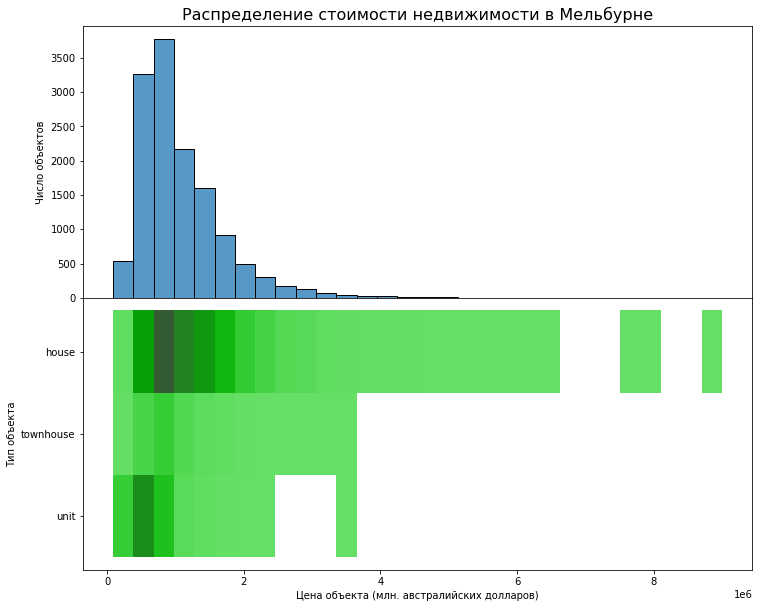

In [439]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data, 
    x='Price', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize=16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_df,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Тип объекта')

hour_utc  minute_utc  username       
0         0           JoeBiden           26
                      realDonaldTrump     6
          1           JoeBiden           16
                      realDonaldTrump    11
          2           JoeBiden            6
                                         ..
23        57          realDonaldTrump    14
          58          JoeBiden            1
                      realDonaldTrump    12
          59          JoeBiden           11
                      realDonaldTrump     5
Name: id, Length: 2197, dtype: int64

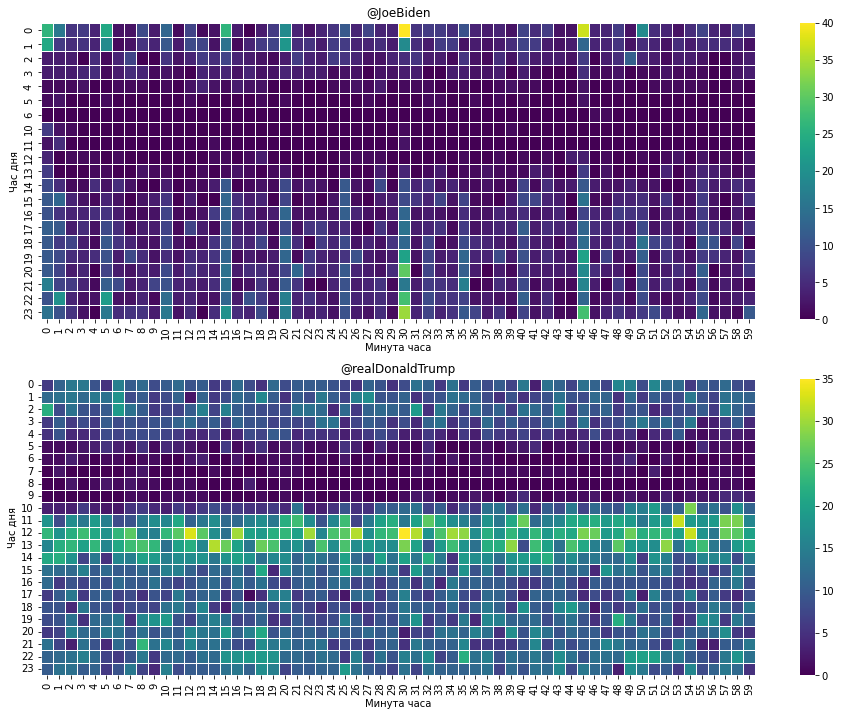

In [441]:
tweets_df = pd.read_csv("https://bit.ly/3cngqgL", 
                 parse_dates=['date_utc'], 
                 dtype={'hour_utc':int,'minute_utc':int,'id':str}
                )
g = tweets_df.groupby(['hour_utc','minute_utc','username'])
tweet_cnt = g.id.nunique()
display(tweet_cnt)
jb_tweet_cnt = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
dt_tweet_cnt = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
jb_heatmap = sns.heatmap(
    jb_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[0]
)
jb_heatmap.set_title('@JoeBiden');
jb_heatmap.set_xlabel('Минута часа');
jb_heatmap.set_ylabel('Час дня');

dt_heatmap = sns.heatmap(
    dt_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[1]
)

dt_heatmap.set_title('@realDonaldTrump');
dt_heatmap.set_xlabel('Минута часа');
dt_heatmap.set_ylabel('Час дня');